# Recurrent Neural Network Assignment
## Gabriel Marcelino, Grant Burk, Eli   
## CST-435
**October 30, 2024**  


## Problem Statement
Goal is to develop a neural network model capable of predicting the next word in a sentence based on a given sequence of words. This model should use a recurrent neural network (RNN), specifically an LSTM architecture, to understand the sequential context of text data. By training on a large corpus of text, the model will be able to suggest the most likely word to follow a given input sequence.

## 1. Import Requirements and Load data


In [19]:
import kagglehub
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import sent_tokenize


path = kagglehub.dataset_download("mikeortman/wikipedia-sentences")

print("Path to dataset files:", path)

# List files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

# Select a subset of files (e.g., first 10 files)
subset_files = files[:10]
print("Subset of files:", subset_files)

# Load and process the subset of files
data = ""
for file in subset_files:
    with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
        data += f.read()

print("Loaded data from subset of files")


# Taking too long to run -> Use only the first 100,000 characters for testing
data = data[:1000000]


Path to dataset files: /Users/gabriel/.cache/kagglehub/datasets/mikeortman/wikipedia-sentences/versions/3
Files in dataset: ['wikisent2.txt']
Subset of files: ['wikisent2.txt']
Loaded data from subset of files


## 2. Visualize data

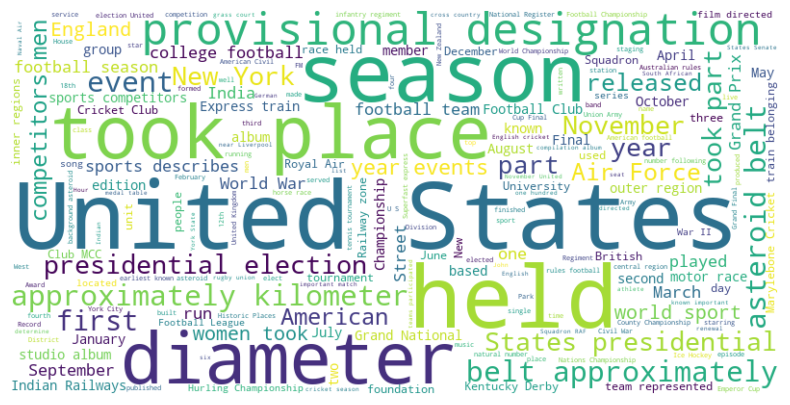

In [20]:
# Visualize data with a word cloud to see most commom words

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. Prepare Data

In [24]:
# Sample of data before
print(data[:1000])

# Step 1: Split the text into sentences
sentences = sent_tokenize(data)

# Step 2: Remove punctuation from each sentence using a compiled regular expression
punctuation_re = re.compile(r'[^\w\s]')
sentences = [punctuation_re.sub('', sentence) for sentence in sentences]

# Sample of data after removing punctuation and splitting into sentences
print(sentences[:10])

# Step 3: Convert each sentence into a sequence of integers using Keras tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)  # Fit on the entire dataset at once
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)  # Convert each sentence into a sequence of integers


0.000123, which corresponds to a distance of 705 Mly, or 216 Mpc.
000webhost is a free web hosting service, operated by Hostinger.
0010x0010 is a Dutch-born audiovisual artist, currently living in Los Angeles.
0-0-1-3 is an alcohol abuse prevention program developed in 2004 at Francis E. Warren Air Force Base based on research by the National Institute on Alcohol Abuse and Alcoholism regarding binge drinking in college students.
0.01 is the debut studio album of H3llb3nt, released on February 20, 1996 by Fifth Colvmn Records.
001 of 3 February 1997, which was signed between the Government of the Republic of Rwanda, and FAPADER.
003230 is a South Korean food manufacturer.
0.04%Gas molecules in soil are in continuous thermal motion according to the kinetic theory of gasses, there is also collision between molecules - a random walk.
0.04% of the votes were invalid.
005.1999.06 is the fifth studio album by the South Korean singer and actress Uhm Jung-hwa.
005 is a 1981 arcade game by Sega.